In [1]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Укажите формулы, которые расшифровываются одинаково
- [x] DV ~ (IV1 + IV2)^2
- [x] DV ~ IV1 * IV2
- [x] DV ~ (IV1*IV2)^2
- [ ] DV ~ IV1:IV2 + Error(subject/(IV1:IV2))

Воспользуемся встроенными данными npk, иллюстрирующими влияние применения различных удобрений на урожайность гороха (yield). Нашей задачей будет выяснить, существенно ли одновременное применение азота (фактор N) и фосфата (фактор P). Примените дисперсионный анализ, где будет проверяться влияние фактора применения азота (N), влияние фактора применения фосфата (P) и их взаимодействие.
В ответе укажите p-value для взаимодействия факторов N и P.

Десятичный разделитель - запятая!

In [2]:
%%R 
str(npk) 

'data.frame':	24 obs. of  5 variables:
 $ block: Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ N    : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 1 1 2 ...
 $ P    : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 1 2 2 2 ...
 $ K    : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 2 1 1 2 ...
 $ yield: num  49.5 62.8 46.8 57 59.8 58.5 55.5 56 62.8 55.8 ...


In [3]:
%%R 
summary(aov(yield ~ N*P, data=npk))

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   5.758 0.0263 *
P            1    8.4    8.40   0.256 0.6187  
N:P          1   21.3   21.28   0.647 0.4305  
Residuals   20  657.4   32.87                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Теперь проведите трехфакторный дисперсионный анализ, где зависимая переменная - это урожайность (yield), а три фактора - типы удобрений (N, P, K). После проведения данного анализа вы получите три значения p - уровня значимости (о значимости каждого из факторов).

Соотнесите названия факторов и значения p - уровня значимости.

In [6]:
%%R 
summary(aov(yield ~ N+P+K, data=npk))

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   6.488 0.0192 *
P            1    8.4    8.40   0.288 0.5974  
K            1   95.2   95.20   3.263 0.0859 .
Residuals   20  583.5   29.17                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Проведите однофакторный дисперсионный анализ на встроенных данных iris. Зависимая переменная - ширина чашелистика (Sepal.Width), независимая переменная - вид (Species). Затем проведите попарные сравнения видов. Какие виды статистически значимо различаются по ширине чашелистика (p < 0.05)?

- [ ] virginica и setosa
- [ ] virginica и versicolor
- [ ] versicolor и setosa

In [7]:
%%R 
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [10]:
%%R 
summary(aov(Sepal.Width ~ Species, iris))

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [12]:
%%R 
TukeyHSD(aov(Sepal.Width ~ Species, iris))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802



В этой задаче вам дан набор данных, в котором представлена информация о температуре нескольких пациентов, которые лечатся разными таблетками и у разных врачей.

Проведите однофакторный дисперсионный анализ с повторными измерениями: влияние типа таблетки (pill) на температуру (temperature) с учётом испытуемого (patient). Каково p-value для влияния типа таблеток на температуру?
Данные: https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv

Не забудьте, важно перевести переменную patient в фактор!  

In [13]:
!wget "https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv"

--2020-04-12 14:45:31--  https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv
Resolving stepic.org (stepic.org)... 13.69.75.239
Connecting to stepic.org (stepic.org)|13.69.75.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520 (1.5K) [application/octet-stream]
Saving to: ‘Pillulkin.csv’

Pillulkin.csv       100%[===================>]   1.48K  --.-KB/s    in 0s      

2020-04-12 14:45:32 (216 MB/s) - ‘Pillulkin.csv’ saved [1520/1520]



In [14]:
%%R 
df <- read.csv("Pillulkin.csv")
str(df)

'data.frame':	40 obs. of  4 variables:
 $ temperature: num  39.3 40.7 39.3 38.2 37 ...
 $ pill       : Factor w/ 2 levels "A","B": 1 2 1 2 1 2 1 2 1 2 ...
 $ doctor     : Factor w/ 2 levels "Aibolit","Pillulkin": 1 1 1 1 1 1 1 1 1 1 ...
 $ patient    : int  1 1 2 2 3 3 4 4 5 5 ...


In [16]:
%%R 
df$patient <- factor(df$patient)
str(df)

'data.frame':	40 obs. of  4 variables:
 $ temperature: num  39.3 40.7 39.3 38.2 37 ...
 $ pill       : Factor w/ 2 levels "A","B": 1 2 1 2 1 2 1 2 1 2 ...
 $ doctor     : Factor w/ 2 levels "Aibolit","Pillulkin": 1 1 1 1 1 1 1 1 1 1 ...
 $ patient    : Factor w/ 10 levels "1","2","3","4",..: 1 1 2 2 3 3 4 4 5 5 ...


In [35]:
%%R 
summary(aov(temperature ~ pill + Error(patient/(pill)), df))


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: patient:pill
          Df Sum Sq Mean Sq F value Pr(>F)
pill       1  0.133   0.133   0.051  0.826
Residuals  9 23.479   2.609               

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 20  87.51   4.375               


Теперь вашей задачей будет провести двухфакторный дисперсионный анализ с повторными измерениями: влияние факторов doctor, влияние фактора pill и их взаимодействие на temperature. Учтите обе внутригрупповые переменные: и тот факт, что один и тот же больной принимает разные таблетки, и тот факт, что  один и тот же больной лечится у разных врачей! Каково F-значение для взаимодействия факторов доктора (doctor) и типа таблеток (pill)?

Данные: https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv

In [36]:
%%R 
summary(aov(temperature ~ doctor:pill + Error(patient/(pill*doctor)), df))


Error: patient
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  42.82   4.758               

Error: patient:pill
            Df Sum Sq Mean Sq F value Pr(>F)
doctor:pill  1  0.133   0.133   0.051  0.826
Residuals    9 23.479   2.609               

Error: patient:doctor
            Df Sum Sq Mean Sq F value Pr(>F)
doctor:pill  1  15.70  15.696   3.113  0.111
Residuals    9  45.37   5.042               

Error: patient:pill:doctor
            Df Sum Sq Mean Sq F value Pr(>F)
doctor:pill  1  0.422  0.4215   0.146  0.711
Residuals    9 26.014  2.8905               


Вспомните графики из лекций и дополните шаблон графика в поле для ответа так (не добавляя еще один geom) , чтобы объединить линиями точки, принадлежащие разным уровням фактора supp. Не забудьте подключить нужный для построение графика пакет.
Пожалуйста, сохраните график в переменную obj.

Желаемый результат:
![](https://ucarecdn.com/8e47f0ca-b605-40a2-b9e0-31027fe66bbd/)

In [0]:
%%R 
library("ggplot2")

In [42]:
%%R 
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


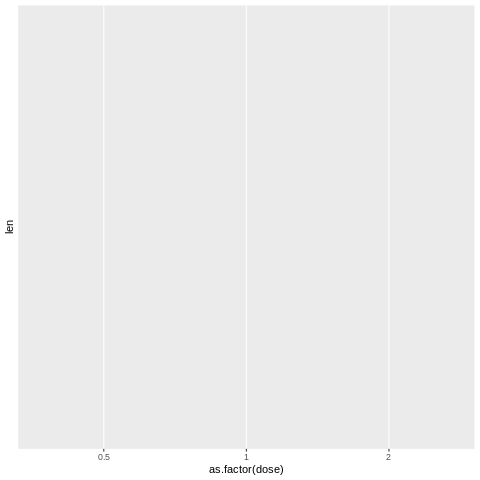

In [54]:
%%R 
ggplot(ToothGrowth, aes(x = as.factor(dose), y = len, col = supp, group = supp))+
    stat_summary(fun.data = mean_cl_boot, geom = 'errorbar', width = 0.1, 
                 position = position_dodge(0.2))+
    stat_summary(fun.data = mean_cl_boot, geom = 'point', size = 3, 
                 position = position_dodge(0.2))+
    stat_summary(fun.data = mean_cl_boot, geom = 'line', 
                 position = position_dodge(0.2))